-Courbes caracteristiques:

$x(t) = at + \xi$

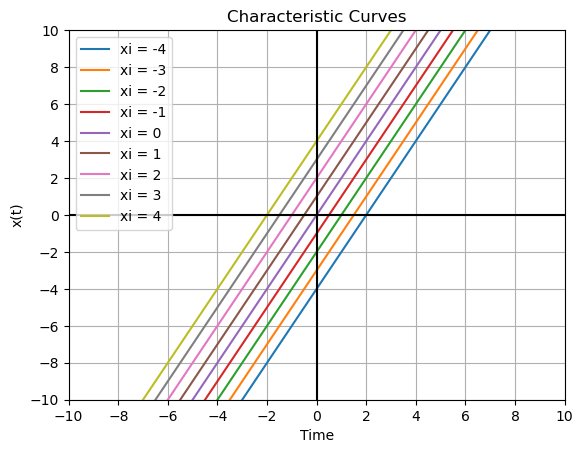

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define the values of a and xi
a = 2
xi_values = [-4, -3, -2, -1, 0, 1, 2, 3, 4]

# Define the time range
t = np.linspace(-10, 10, 100)

# Plot the characteristic curves for each xi value
for xi in xi_values:
    x = a * t + xi
    plt.plot(t, x, label=f"xi = {xi}")

# Plot the x and y axes
plt.axhline(0, color='black')
plt.axvline(0, color='black')

plt.xlabel('Time')
plt.ylabel('x(t)')
plt.title('Characteristic Curves')
plt.grid(True)

# Set the x and y axes limits to center at 0
plt.xlim(-10, 10)
plt.ylim(-10, 10)

# Set the x and y axis ticks
plt.xticks(np.arange(-10, 11, 2))
plt.yticks([-10, -5, 0, 5, 10])

# Hide the legend
plt.legend().set_visible(False)

plt.show()


In [41]:
np.arange(0, 2.5, dt).round(2)

array([0.  , 0.04, 0.08, 0.12, 0.16, 0.2 , 0.24, 0.28, 0.32, 0.36, 0.4 ,
       0.44, 0.48, 0.52, 0.56, 0.6 , 0.64, 0.68, 0.72, 0.76, 0.8 , 0.84,
       0.88, 0.92, 0.96, 1.  , 1.04, 1.08, 1.12, 1.16, 1.2 , 1.24, 1.28,
       1.32, 1.36, 1.4 , 1.44, 1.48, 1.52, 1.56, 1.6 , 1.64, 1.68, 1.72,
       1.76, 1.8 , 1.84, 1.88, 1.92, 1.96, 2.  , 2.04, 2.08, 2.12, 2.16,
       2.2 , 2.24, 2.28, 2.32, 2.36, 2.4 , 2.44, 2.48])

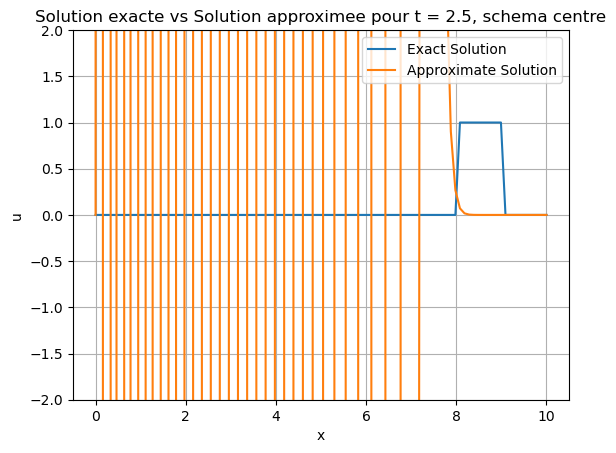

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


def u_0(x):
    if 3 <= x <= 4:
        return 1
    else:
        return 0
    
L = 10
a = 2
N = 100
CFL = 0.8
dx = L/(N-1)
dt = round(CFL*dx/a, 2)

x = np.linspace(0, L, N)

u0 = np.zeros(N)
u0[int(3/dx):int(4/dx)] = 1

u = u0.copy()
un = np.zeros(N)

t = 0
t1 = 2.5

while t <= t1:

    un = u.copy()
    u_exact = u.copy()
    for j in range(1, N-1):
        u[j] = un[j] - a*dt/(2*dx)*(un[j+1]-un[j-1])
        u_exact[j] = u_0(x[j] - a*t1)
    # Conditions aux limites de Dirichlet
    u[0] = u[-1]
    u[-1] = u[-2]

    u_exact[0] = u_exact[-1]
    u_exact[-1] = u_exact[-2]

    # Conditions aux limites de Neumann (derivée nulle aux bords)
    u[N-1] = 0
    u_exact[N-1] = 0

    t = round(t + dt, 2)

u_exact = [u_0(x - a*t1) for x in x]

plt.plot(x, u_exact, label='Exact Solution')
plt.plot(x, u, label='Approximate Solution')
plt.xlabel('x')
plt.ylabel('u')
plt.title('Solution exacte vs Solution approximee pour t = 2.5, schema centre')
plt.legend()
plt.ylim(-2, 2)  # Set y-axis limits
plt.grid(True)  # Add grid
plt.show()

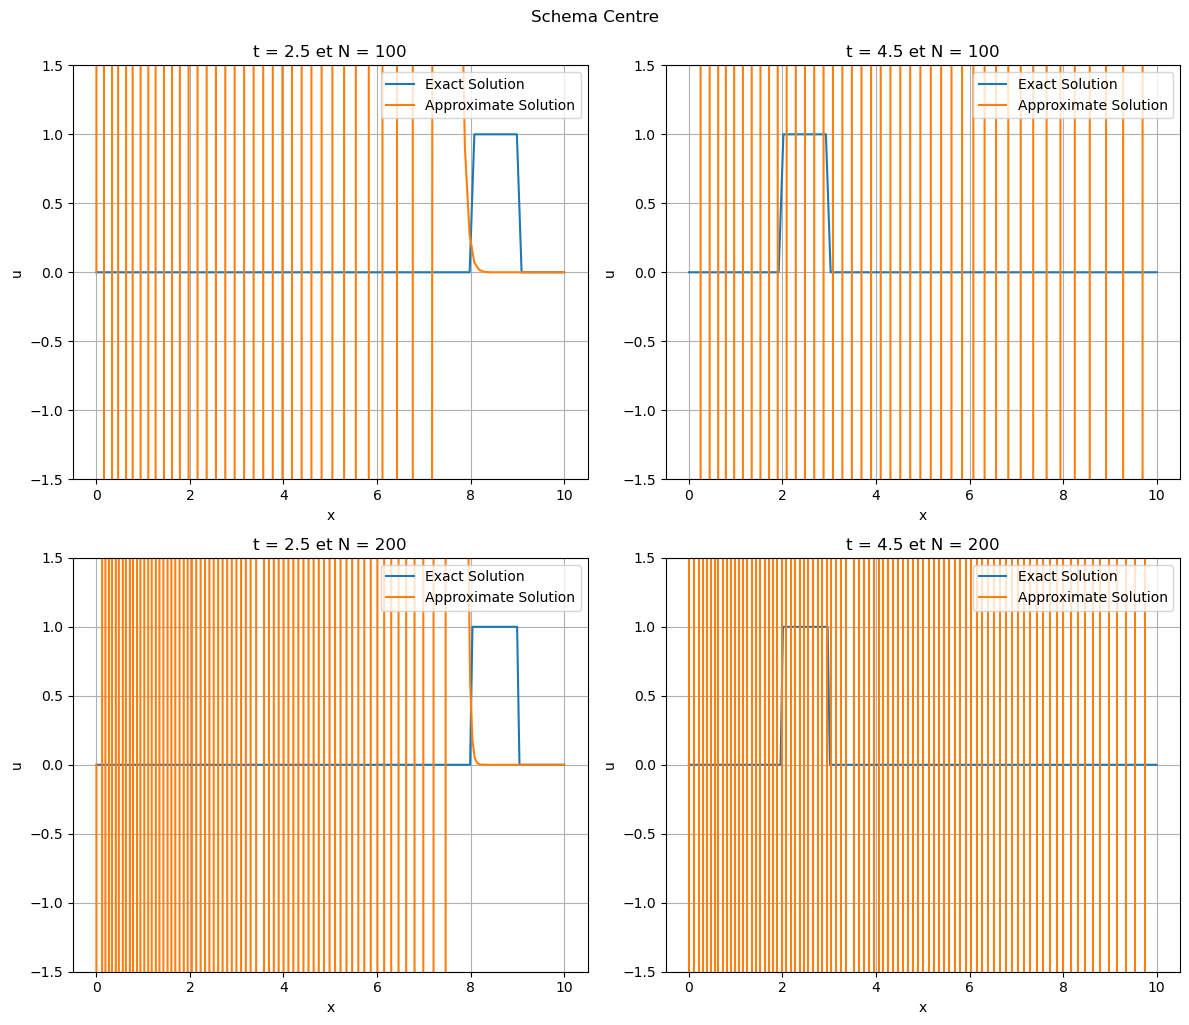

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


def u_0(x):
    if 3 <= x <= 4:
        return 1
    else:
        return 0

L = 10
a = 2
N = 100
CFL = 0.8
dx = L/(N-1)
dt = round(CFL*dx/a, 2)

x = np.linspace(0, L, N)

u0 = np.zeros(N)
u0[int(3/dx):int(4/dx)] = 1

u = u0.copy()
un = np.zeros(N)

t = 0
t1 = 2.5
t2 = 4.5

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot for t = t1
while t <= t1:
    un = u.copy()
    for j in range(1, N-1):
        u[j] = un[j] - a*dt/(2*dx)*(un[j+1]-un[j-1])
    u[0] = u[-2]
    u[-1] = u[-2]
    
    t += dt

u_exact = [u_0((x - a*t1)%L) for x in x]

axs[0, 0].plot(x, u_exact, label='Exact Solution')
axs[0, 0].plot(x, u, label='Approximate Solution')
axs[0, 0].set_xlabel('x')
axs[0, 0].set_ylabel('u')
axs[0, 0].set_title(f't = {t1} et N = {N}')
axs[0, 0].legend()
axs[0, 0].set_ylim(-1.5, 1.5)
axs[0, 0].grid(True)

# Plot for t = t2
t = 0
u = u0.copy()

while t <= t2:
    un = u.copy()
    for j in range(1, N-1):
        u[j] = un[j] - a*dt/(2*dx)*(un[j+1]-un[j-1])
    u[0] = u[-2]
    u[-1] = u[-2]
    
    t += dt

u_exact = [u_0((x - a*t2)%L) for x in x]

axs[0, 1].plot(x, u_exact, label='Exact Solution')
axs[0, 1].plot(x, u, label='Approximate Solution')
axs[0, 1].set_xlabel('x')
axs[0, 1].set_ylabel('u')
axs[0, 1].set_title(f't = {t2} et N = {N}')
axs[0, 1].legend()
axs[0, 1].set_ylim(-1.5, 1.5)
axs[0, 1].grid(True)

# Plot for t = t1 with N=100
N = 200
dx = L/(N-1)
dt = round(CFL*dx/a, 2)

x = np.linspace(0, L, N)

u0 = np.zeros(N)
u0[int(3/dx):int(4/dx)] = 1

u = u0.copy()
un = np.zeros(N)

t = 0
u = u0.copy()

while t <= t1:
    un = u.copy()
    for j in range(1, N-1):
        u[j] = un[j] - a*dt/(2*dx)*(un[j+1]-un[j-1])
    u[0] = u[-2]
    u[-1] = u[-2]
    
    t += dt

u_exact = [u_0((x - a*t1)%L) for x in x]

axs[1, 0].plot(x, u_exact, label='Exact Solution')
axs[1, 0].plot(x, u, label='Approximate Solution')
axs[1, 0].set_xlabel('x')
axs[1, 0].set_ylabel('u')
axs[1, 0].set_title(f't = {t1} et N = {N}')
axs[1, 0].legend()
axs[1, 0].set_ylim(-1.5, 1.5)
axs[1, 0].grid(True)

# Plot for t = t2 with N=200
t = 0
u = u0.copy()

while t <= t2:
    un = u.copy()
    for j in range(1, N-1):
        u[j] = un[j] - a*dt/(2*dx)*(un[j+1]-un[j-1])
    u[0] = u[-2]
    u[-1] = u[-2]

    t += dt

u_exact = [u_0((x - a*t2)%L) for x in x]

axs[1, 1].plot(x, u_exact, label='Exact Solution')
axs[1, 1].plot(x, u, label='Approximate Solution')
axs[1, 1].set_xlabel('x')
axs[1, 1].set_ylabel('u')
axs[1, 1].set_title(f't = {t2} et N = {N}')
axs[1, 1].legend()
axs[1, 1].set_ylim(-1.5, 1.5)
axs[1, 1].grid(True)

plt.tight_layout()
plt.suptitle("Schema Centre", y=1.02)
plt.show()

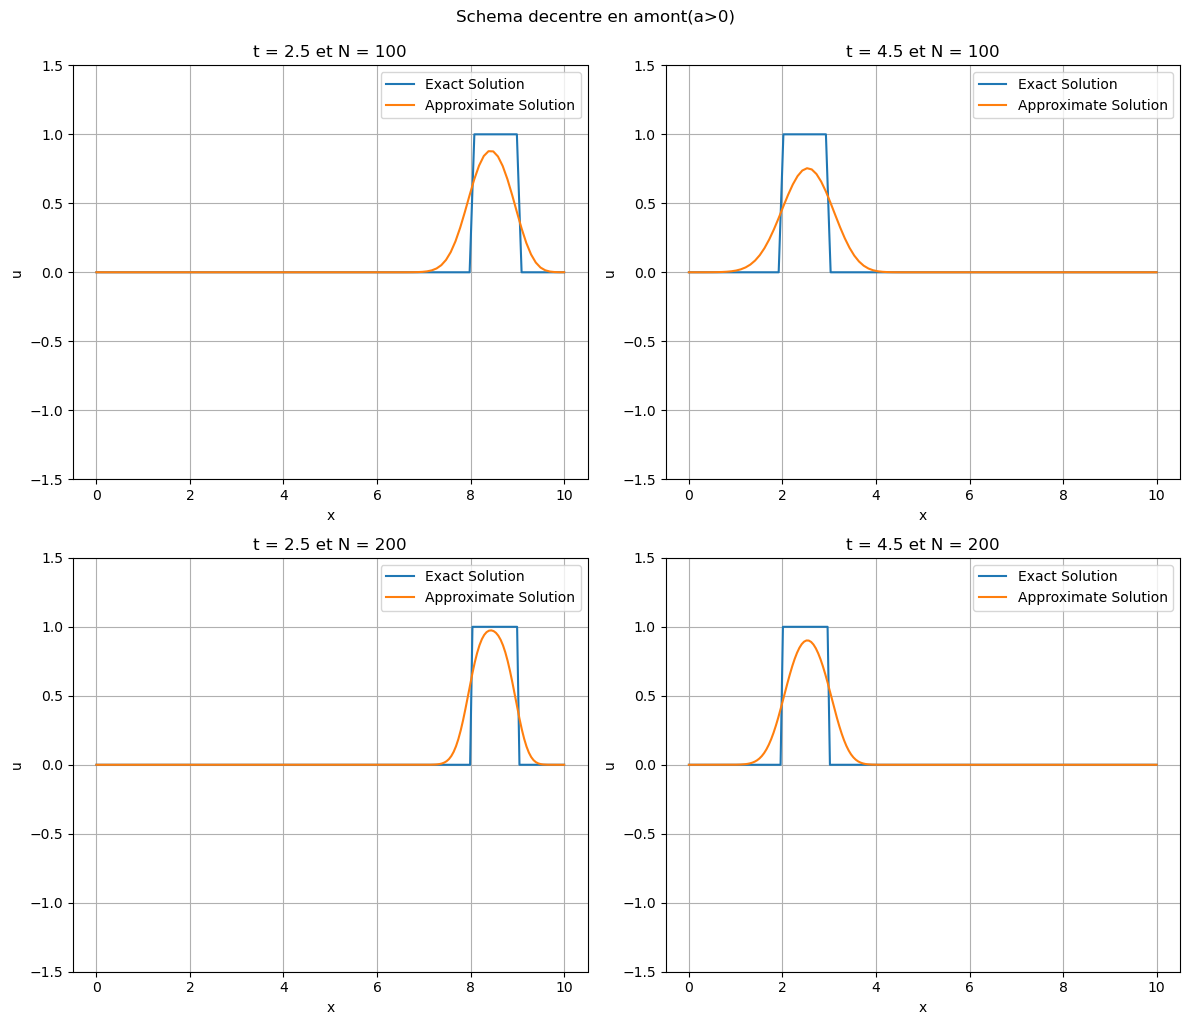

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


def u_0(x):
    if 3 <= x <= 4:
        return 1
    else:
        return 0

L = 10
a = 2
N = 100
CFL = 0.8
dx = L/(N-1)
dt = round(CFL*dx/a, 2)

x = np.linspace(0, L, N)

u0 = np.zeros(N)
u0[int(3/dx):int(4/dx)] = 1

u = u0.copy()
un = np.zeros(N)

t = 0
t1 = 2.5
t2 = 4.5

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot for t = t1
while t <= t1:
    un = u.copy()
    for j in range(1, N-1):
        u[j] = un[j] - a*dt/dx*(un[j]-un[j-1])
    u[0] = u[-2]
    u[-1] = u[-2]

    t += dt

u_exact = [u_0((x - a*t1)%L) for x in x]

axs[0, 0].plot(x, u_exact, label='Exact Solution')
axs[0, 0].plot(x, u, label='Approximate Solution')
axs[0, 0].set_xlabel('x')
axs[0, 0].set_ylabel('u')
axs[0, 0].set_title(f't = {t1} et N = {N}')
axs[0, 0].legend()
axs[0, 0].set_ylim(-1.5, 1.5)
axs[0, 0].grid(True)

# Plot for t = t2
t = 0
u = u0.copy()
while t <= t2:
    un = u.copy()
    for j in range(1, N-1):
        u[j] = un[j] - a*dt/dx*(un[j]-un[j-1])
    u[0] = u[-2]
    u[-1] = u[-2]

    t += dt

u_exact = [u_0((x - a*t2)%L) for x in x]

axs[0, 1].plot(x, u_exact, label='Exact Solution')
axs[0, 1].plot(x, u, label='Approximate Solution')
axs[0, 1].set_xlabel('x')
axs[0, 1].set_ylabel('u')
axs[0, 1].set_title(f't = {t2} et N = {N}')
axs[0, 1].legend()
axs[0, 1].set_ylim(-1.5, 1.5)
axs[0, 1].grid(True)

# Plot for t = t1 with N=200
N = 200
dx = L/(N-1)
dt = round(CFL*dx/a, 2)

x = np.linspace(0, L, N)

u0 = np.zeros(N)
u0[int(3/dx):int(4/dx)] = 1

u = u0.copy()
un = np.zeros(N)

t = 0
u = u0.copy()

while t <= t1:
    un = u.copy()
    for j in range(1, N-1):
        u[j] = un[j] - a*dt/dx*(un[j]-un[j-1])
    u[0] = u[-2]
    u[-1] = u[-2]

    t += dt

u_exact = [u_0((x - a*t1)%L) for x in x]

axs[1, 0].plot(x, u_exact, label='Exact Solution')
axs[1, 0].plot(x, u, label='Approximate Solution')
axs[1, 0].set_xlabel('x')
axs[1, 0].set_ylabel('u')
axs[1, 0].set_title(f't = {t1} et N = {N}')
axs[1, 0].legend()
axs[1, 0].set_ylim(-1.5, 1.5)
axs[1, 0].grid(True)

# Plot for t = t2 with N=200
t = 0
u = u0.copy()

while t <= t2:
    un = u.copy()
    for j in range(1, N-1):
        u[j] = un[j] - a*dt/dx*(un[j]-un[j-1])
    u[0] = u[-2]
    u[-1] = u[-2]

    t += dt

u_exact = [u_0((x - a*t2)%L) for x in x]

axs[1, 1].plot(x, u_exact, label='Exact Solution')
axs[1, 1].plot(x, u, label='Approximate Solution')
axs[1, 1].set_xlabel('x')
axs[1, 1].set_ylabel('u')
axs[1, 1].set_title(f't = {t2} et N = {N}')
axs[1, 1].legend()
axs[1, 1].set_ylim(-1.5, 1.5)
axs[1, 1].grid(True)

plt.tight_layout()
plt.suptitle("Schema decentre en amont(a>0)", y=1.02)
plt.show()

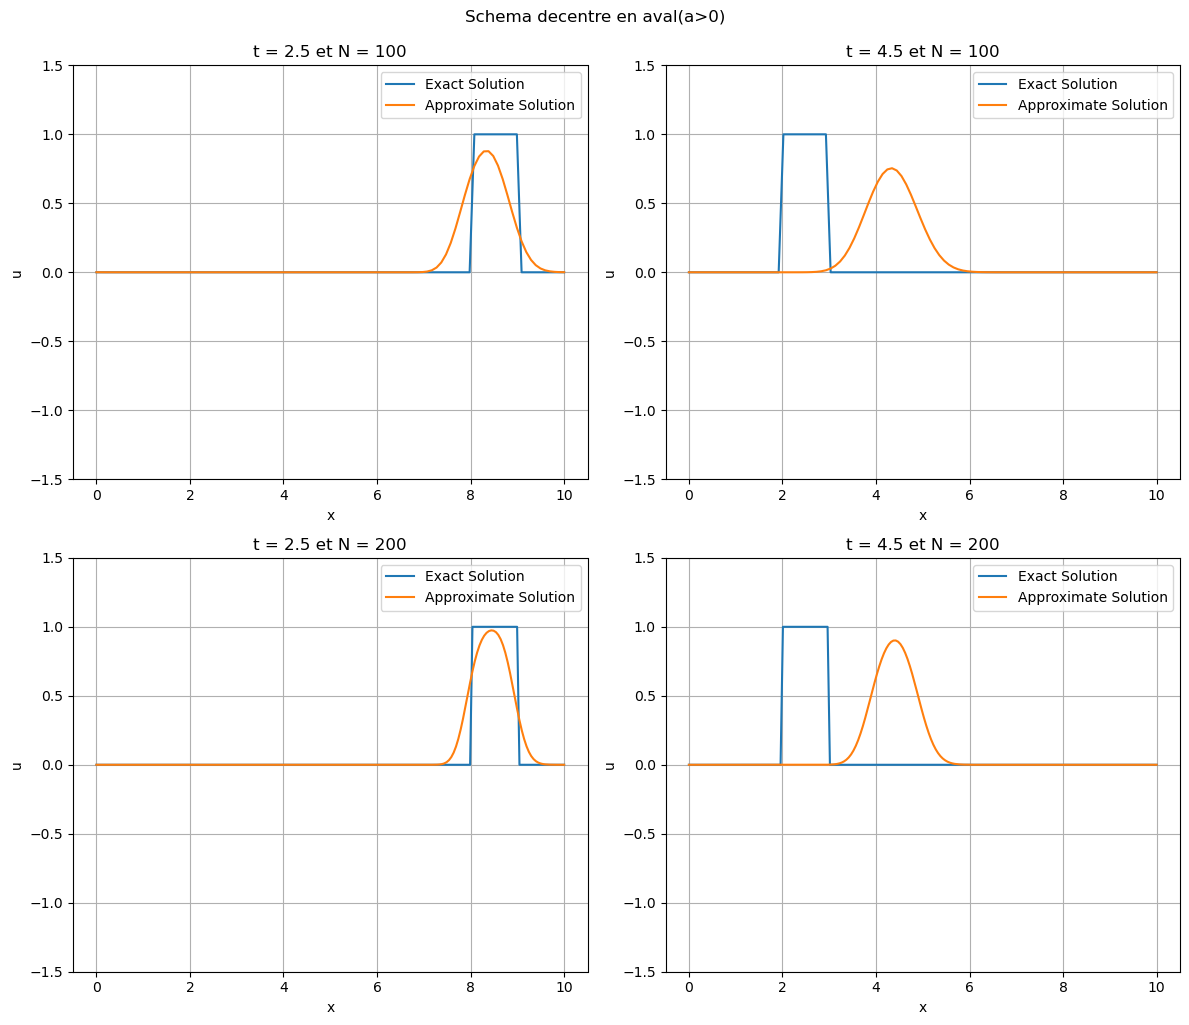

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


def u_0(x):
    if 3 <= x <= 4:
        return 1
    else:
        return 0
      
L = 10
a = 2
N = 100
CFL = 0.8
dx = L/(N-1)
dt = round(CFL*dx/a, 2)

x = np.linspace(0, L, N)

u0 = np.zeros(N)
u0[int(3/dx):int(4/dx)] = 1

u = u0.copy()

un = np.zeros(N)

t = 0
t1 = 2.5
t2 = 4.5

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot for t = t1
while t <= t1:
    un = u.copy()
    for j in range(0, N-1):
        u[j] = un[j] - a*dt/dx*(un[j]-un[j+1])
    u[-1] = u[0]

    t += dt
    
u_exact = [u_0((x - a*t1)%L) for x in x]

_=axs[0, 0].plot(x, u_exact, label='Exact Solution')
_=axs[0, 0].plot(x, u, label='Approximate Solution')
_=axs[0, 0].set_xlabel('x')
_=axs[0, 0].set_ylabel('u')
_=axs[0, 0].set_title(f't = {t1} et N = {N}')
_=axs[0, 0].legend()
_=axs[0, 0].set_ylim(-1.5, 1.5)
_=axs[0, 0].grid(True)
  
# Plot for t = t2
t = 0
u = u0.copy()

while t <= t2:
    un = u.copy()
    for j in range(0, N-1):
        u[j] = un[j] - a*dt/dx*(un[j]-un[j+1])
    u[-1] = u[0]

    t += dt
    
u_exact = [u_0((x - a*t2)%L) for x in x]

_=axs[0, 1].plot(x, u_exact, label='Exact Solution')
_=axs[0, 1].plot(x, u, label='Approximate Solution')
_=axs[0, 1].set_xlabel('x')
_=axs[0, 1].set_ylabel('u')
_=axs[0, 1].set_title(f't = {t2} et N = {N}')
_=axs[0, 1].legend()
_=axs[0, 1].set_ylim(-1.5, 1.5)
_=axs[0, 1].grid(True)

# Plot for t = t1 with N=200
N = 200
dx = L/(N-1)
dt = round(CFL*dx/a, 2)

x = np.linspace(0, L, N)

u0 = np.zeros(N)
u0[int(3/dx):int(4/dx)] = 1

u = u0.copy()

un = np.zeros(N)

t = 0
u = u0.copy()

while t <= t1:
    un = u.copy()
    for j in range(0, N-1):
        u[j] = un[j] - a*dt/dx*(un[j]-un[j+1])
    u[-1] = u[0]

    t += dt
    
u_exact = [u_0((x - a*t1)%L) for x in x]

_=axs[1, 0].plot(x, u_exact, label='Exact Solution')
_=axs[1, 0].plot(x, u, label='Approximate Solution')
_=axs[1, 0].set_xlabel('x')
_=axs[1, 0].set_ylabel('u')
_=axs[1, 0].set_title(f't = {t1} et N = {N}')
_=axs[1, 0].legend()
_=axs[1, 0].set_ylim(-1.5, 1.5)
_=axs[1, 0].grid(True)

# Plot for t = t2 with N=200
t = 0
u = u0.copy()

while t <= t2:
    un = u.copy()
    for j in range(0, N-1):
        u[j] = un[j] - a*dt/dx*(un[j]-un[j+1])
    u[-1] = u[0]

    t += dt
    
u_exact = [u_0((x - a*t2)%L) for x in x]

_=axs[1, 1].plot(x, u_exact, label='Exact Solution')
_=axs[1, 1].plot(x, u, label='Approximate Solution')
_=axs[1, 1].set_xlabel('x')
_=axs[1, 1].set_ylabel('u')
_=axs[1, 1].set_title(f't = {t2} et N = {N}')
_=axs[1, 1].legend()
_=axs[1, 1].set_ylim(-1.5, 1.5)
_=axs[1, 1].grid(True)

_=plt.tight_layout()
_=plt.suptitle("Schema decentre en aval(a>0)", y=1.02)
plt.show()


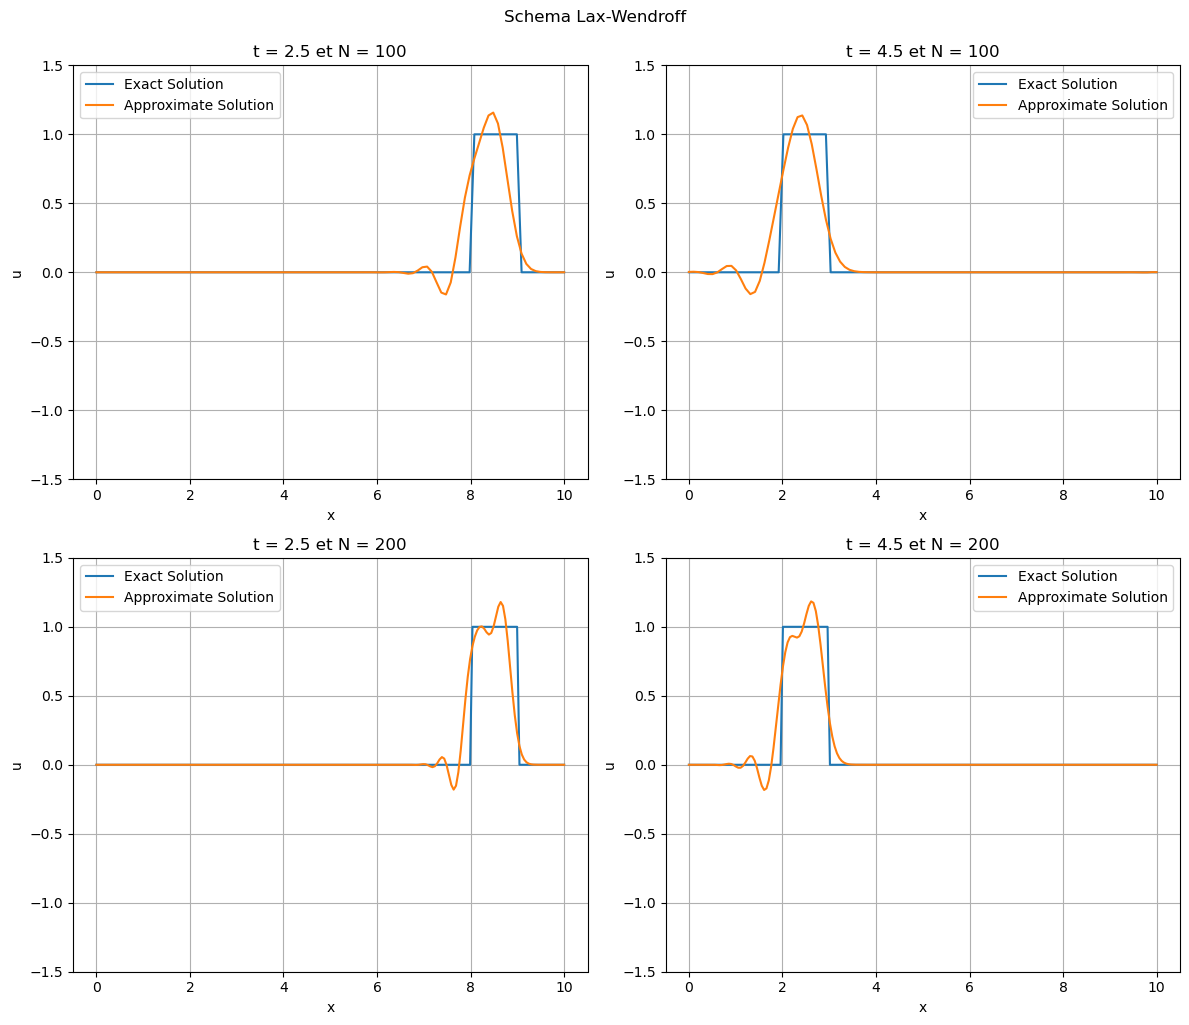

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


def u_0(x):
    if 3 <= x <= 4:
        return 1
    else:
        return 0
      
L = 10
a = 2
N = 100
CFL = 0.8
dx = L/(N-1)
dt = round(CFL*dx/a, 2)

x = np.linspace(0, L, N)

u0 = np.zeros(N)
u0[int(3/dx):int(4/dx)] = 1

u = u0.copy()
un = np.zeros(N)

t = 0

t1 = 2.5
t2 = 4.5

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot for t = t1
while t <= t1:
    un = u.copy()
    for j in range(1, N-1):
        u[j] = un[j] - ((a*dt)/(2*dx))*(un[j+1]-un[j-1]) + (((a**2)*dt**2)/(2*dx**2))*(un[j-1]-2*un[j]+un[j+1])
    u[0] = u[-1]
    u[-1] = u[-2]

    t += dt
    
u_exact = [u_0((x - a*t1)%L) for x in x]

_=axs[0, 0].plot(x, u_exact, label='Exact Solution')
_=axs[0, 0].plot(x, u, label='Approximate Solution')
_=axs[0, 0].set_xlabel('x')
_=axs[0, 0].set_ylabel('u')
_=axs[0, 0].set_title(f't = {t1} et N = {N}')
_=axs[0, 0].legend()
_=axs[0, 0].set_ylim(-1.5, 1.5)
_=axs[0, 0].grid(True)

# Plot for t = t2
t = 0
u = u0.copy()

while t <= t2:
    un = u.copy()
    for j in range(1, N-1):
        u[j] = un[j] - ((a*dt)/(2*dx))*(un[j+1]-un[j-1]) + (((a**2)*dt**2)/(2*dx**2))*(un[j-1]-2*un[j]+un[j+1])
    u[0] = u[-1]
    u[-1] = u[-2]

    t += dt
    
u_exact = [u_0((x - a*t2)%L) for x in x]

_=axs[0, 1].plot(x, u_exact, label='Exact Solution')
_=axs[0, 1].plot(x, u, label='Approximate Solution')
_=axs[0, 1].set_xlabel('x')
_=axs[0, 1].set_ylabel('u')
_=axs[0, 1].set_title(f't = {t2} et N = {N}')
_=axs[0, 1].legend()
_=axs[0, 1].set_ylim(-1.5, 1.5)
_=axs[0, 1].grid(True)

# Plot for t = t1 with N=200
N = 200
dx = L/(N-1)
dt = round(CFL*dx/a, 2)

x = np.linspace(0, L, N)

u0 = np.zeros(N)
u0[int(3/dx):int(4/dx)] = 1

u = u0.copy()
un = np.zeros(N)

t = 0
u = u0.copy()

while t <= t1:
    un = u.copy()
    for j in range(1, N-1):
        u[j] = un[j] - ((a*dt)/(2*dx))*(un[j+1]-un[j-1]) + (((a**2)*dt**2)/(2*dx**2))*(un[j-1]-2*un[j]+un[j+1])
    u[0] = u[-1]
    u[-1] = u[-2]

    t += dt
    
u_exact = [u_0((x - a*t1)%L) for x in x]

_=axs[1, 0].plot(x, u_exact, label='Exact Solution')
_=axs[1, 0].plot(x, u, label='Approximate Solution')
_=axs[1, 0].set_xlabel('x')
_=axs[1, 0].set_ylabel('u')
_=axs[1, 0].set_title(f't = {t1} et N = {N}')
_=axs[1, 0].legend()
_=axs[1, 0].set_ylim(-1.5, 1.5)
_=axs[1, 0].grid(True)

# Plot for t = t2 with N=200
t = 0
u = u0.copy()

while t <= t2:
    un = u.copy()
    for j in range(1, N-1):
        u[j] = un[j] - ((a*dt)/(2*dx))*(un[j+1]-un[j-1]) + (((a**2)*dt**2)/(2*dx**2))*(un[j-1]-2*un[j]+un[j+1])
    u[0] = u[-1]
    u[-1] = u[-2]

    t += dt
    
u_exact = [u_0((x - a*t2)%L) for x in x]

_=axs[1, 1].plot(x, u_exact, label='Exact Solution')
_=axs[1, 1].plot(x, u, label='Approximate Solution')
_=axs[1, 1].set_xlabel('x')
_=axs[1, 1].set_ylabel('u')
_=axs[1, 1].set_title(f't = {t2} et N = {N}')
_=axs[1, 1].legend()
_=axs[1, 1].set_ylim(-1.5, 1.5)
_=axs[1, 1].grid(True)

_=plt.tight_layout()
_=plt.suptitle("Schema Lax-Wendroff", y=1.02)
plt.show()

In [6]:
# Schema 1 (centré)
L = 10
a = 2
N = 100
CFL = 0.99
dx = L/(N-1)
dt = round(CFL*dx/a, 2)

x = np.linspace(0, L, N)

u0 = np.zeros(N)

u0[int(3/dx):int(4/dx)] = 1

u = u0.copy()

un = np.zeros(N)

t = 0

while t < 2.5:
    un = u.copy()
    for j in range(1, N-1):
        u[j] = un[j] - a*dt/(2*dx)*(un[j+1]-un[j-1])
    u[0] = u[-1]
    u[-2] = u[-1]

    t = round(t+dt, 2)
    
L1_centre = round(np.sum(np.abs(u-u0)*dx), 2)

In [7]:
# Schema 2 (decentre)
N = 100
CFL = 0.99
dx = L/(N-1)
dt = round(CFL*dx/a, 2)

x = np.linspace(0, L, N)

u0 = np.zeros(N)
u0[int(3/dx):int(4/dx)] = 1

u = u0.copy()

un = np.zeros(N)

t = 0

while t < 2.5:
    un = u.copy()
    for j in range(1, N):
        u[j] = un[j] - a*dt/dx*(un[j]-un[j-1])
    u[0] = u[-1]
    u[-2] = u[-1]
    
    t = round(t+dt, 2)
    
L1_decentre = round(np.sum(np.abs(u-u0)*dx), 2)

In [8]:
# Schema 3 (Lax-Friedrichs)
N = 100
CFL = 0.99
dx = L/(N-1)
dt = round(CFL*dx/a, 2)

x = np.linspace(0, L, N)

u0 = np.zeros(N)
u0[int(3/dx):int(4/dx)] = 1

u = u0.copy()

un = np.zeros(N)

t = 0

while t < 2.5:
    un = u.copy()
    for j in range(1, N-1):
        u[j] = 0.5*(un[j-1]+un[j+1]) - a*dt/(2*dx)*(un[j+1]-un[j-1])
    u[0] = u[-1]
    u[-2] = u[-1]

    t = round(t+dt, 2)
    
L1_Lax_Friedrichs = round(np.sum(np.abs(u-u0)*dx), 2)

In [9]:
# Schema 4 (Lax-Wendroff)

N = 100

CFL = 0.99

dx = L/(N-1)

dt = round(CFL*dx/a, 2)

x = np.linspace(0, L, N)

u0 = np.zeros(N)

u0[int(3/dx):int(4/dx)] = 1

u = u0.copy()

un = np.zeros(N)

t = 0

while t < 2.5:
    un = u.copy()
    for j in range(1, N-1):
        u[j] = un[j] - a*dt/dx*(un[j]-un[j-1]) + a**2*dt/(2*dx**2)*(un[j-1]-2*un[j]+un[j+1])
    u[0] = u[-1]
    u[-2] = u[-1]
    
    t = round(t+dt, 2)
    
L1_Lax_Wendroff = round(np.sum(np.abs(u-u0)*dx), 2)

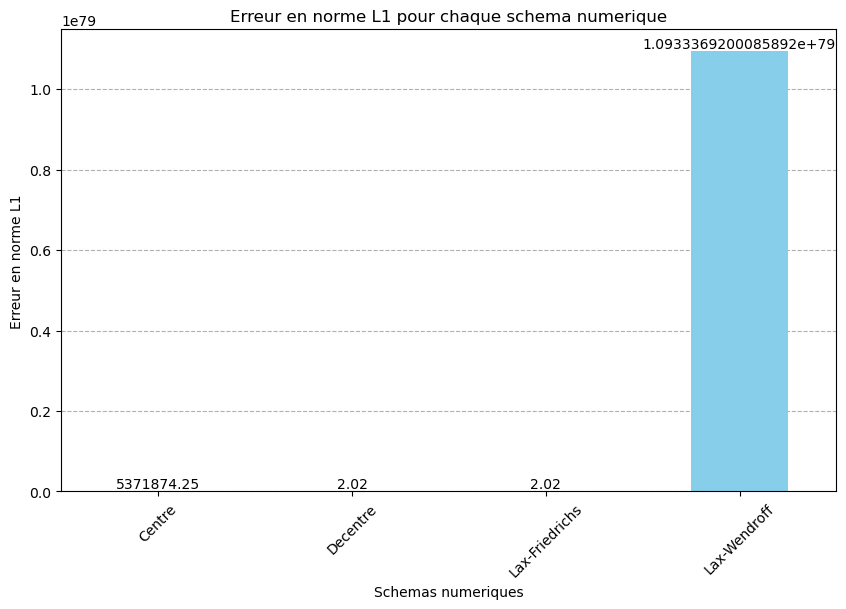

In [11]:
# All errors in pandas series
import pandas as pd

errors = pd.Series([L1_centre, L1_decentre, L1_Lax_Friedrichs, L1_Lax_Wendroff], index=['Centre', 'Decentre', 'Lax-Friedrichs', 'Lax-Wendroff'])

# Plot errors with barplot having error value above bar
ax = errors.plot(kind='bar', figsize=(10, 6), color='skyblue', zorder=2, width=0.5)

for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.1, round(i.get_height(), 2), ha='center', va='bottom')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Rotate xticks by 45 degrees

ax.set_xlabel('Schemas numeriques')
ax.set_ylabel('Erreur en norme L1')
ax.set_title('Erreur en norme L1 pour chaque schema numerique')
ax.grid(axis='y', linestyle='--', zorder=1)
plt.show()